<h1>Импорт библиотек

In [19]:
import numpy as np
import matplotlib.pyplot as plt

<h1>Задача 1. Дан набор из $p$ матриц размерностью $(n, n)$ и $p$ векторов размерностью $(n, 1)$, найти сумму произведений матриц на векторы. Написать тесты для кода

In [78]:
def sum_prod(X, V):
    result = [[0], [0]]
    for i in range(len(X)):
        result += X[i].dot(V[i])

    return result

matrix_1 = [np.array([[1, 2],
                        [3, 4]]),
            np.array([[5, 6],
                        [7, 8]])]

vector_1 = [np.array([[1],
                        [2]]),
            np.array([[3],
                        [4]])]

result_1 = np.array([[5 + 39], 
                        [11 + 53]])
assert np.array_equiv(sum_prod(matrix_1, vector_1), result_1)

matrix_2 = [np.array([[4, 1],
                        [2, 2]]), 
            np.array([[1, 0],
                        [0, 1]])]

vector_2 = [np.array([[1],
                        [2]]),
            np.array([[3],
                        [4]])]

result_2 = np.array([[6 + 3], 
                        [6 + 4]])

assert np.array_equiv(sum_prod(matrix_2, vector_2), result_2)

<h1>Задача 2. Дана матрица M, напишите функцию, которая бинаризует матрицу по некоторому threshold (то есть, все значения большие threshold становятся равными 1, иначе 0). Напишите тесты для кода

In [77]:
def binarize(M, threshold=0.5):
    return (M > threshold).astype(int)

matrix = np.array([[0.1, 0.8, 0.3],
                        [10, 0.5, 1.1]])

assert np.all(binarize(matrix) == np.array([[0, 1, 0],
                                                 [1, 0, 1]]))

assert np.all(binarize(matrix, 1) == np.array([[0, 0, 0],
                                                      [1, 0, 1]]))

assert np.all(binarize(matrix, 0) == np.array([[1, 1, 1],
                                                      [1, 1, 1]]))

<h1>Задача 3. Напишите функцию, которая возвращает уникальные элементы из каждой строки матрицы. Напишите такую же функцию, но для столбцов. Напишите тесты для кода

In [85]:
def unique_rows(mat):
    return [np.unique(row) for row in mat]

def unique_columns(mat):
    return [np.unique(col) for col in mat.T]

matrix = np.array([[1, 2, 3],
                   [4, 1, 6],
                   [7, 8, 9]])

assert np.array_equal(unique_rows(matrix), [np.array([1, 2, 3]),
                                            np.array([1, 4, 6]),
                                            np.array([7, 8, 9])])

assert np.array_equal(unique_columns(matrix), [np.array([1, 4, 7]),
                                            np.array([1, 2, 8]),
                                            np.array([3, 6, 9])])

test_matrix = np.array([[1, 2, 2, 3, 1],
                        [4, 4, 5, 4, 6],
                        [7, 8, 8, 9, 9]])

assert np.array_equal(unique_rows(test_matrix), [np.array([1, 2, 3]),
                                                 np.array([4, 5, 6]),
                                                 np.array([7, 8, 9])])

assert np.array_equal(unique_columns(test_matrix), [np.array([1, 4, 7]),
                                                 np.array([2, 4, 8]),
                                                 np.array([2, 5, 8]),
                                                 np.array([3, 4, 9]),
                                                 np.array([ 1, 6, 9])])

<h1>Задача 4. Напишите функцию, которая заполняет матрицу с размерами $(m, n)$ случайными числами, распределенными по нормальному закону. Затем считает мат. ожидание и дисперсию для каждого из столбцов и строк, а также строит для каждой строки и столбца гистограмму значений (использовать функцию hist из модуля matplotlib.plot)

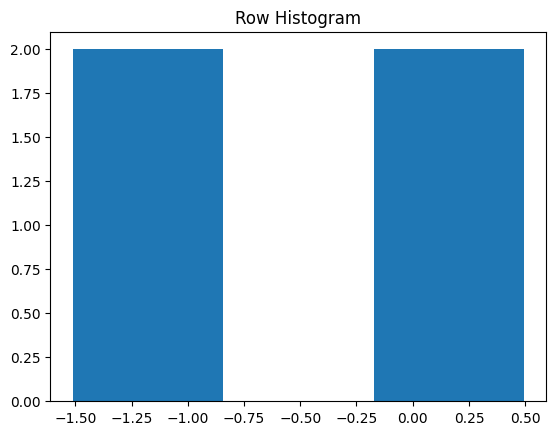

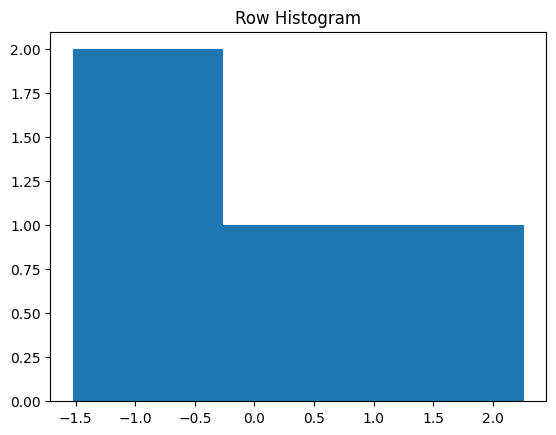

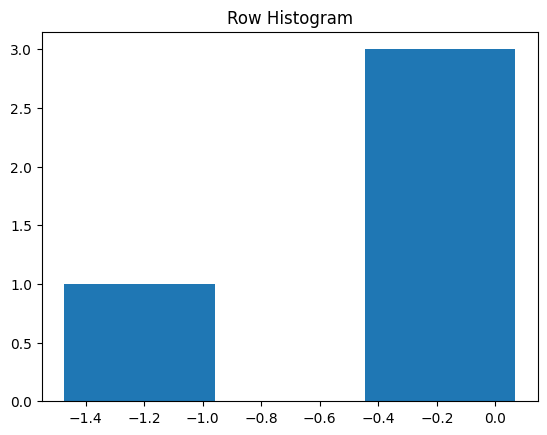

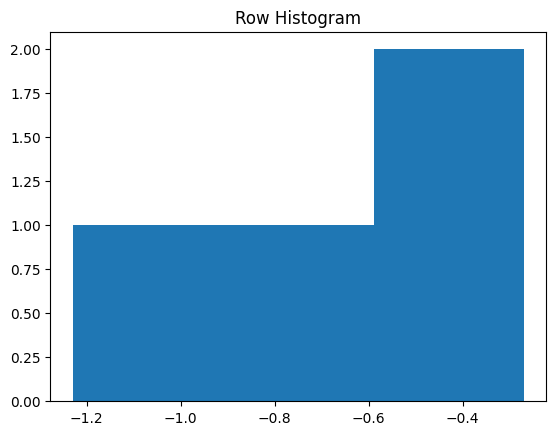

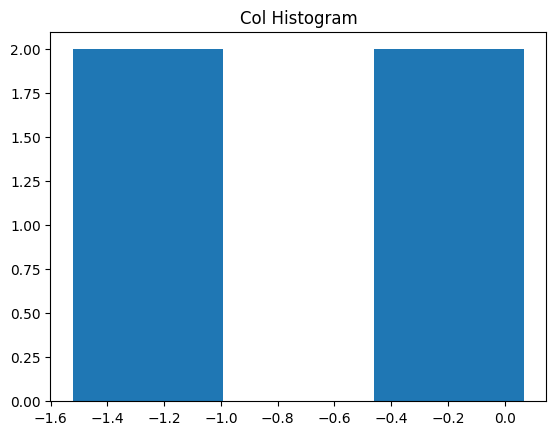

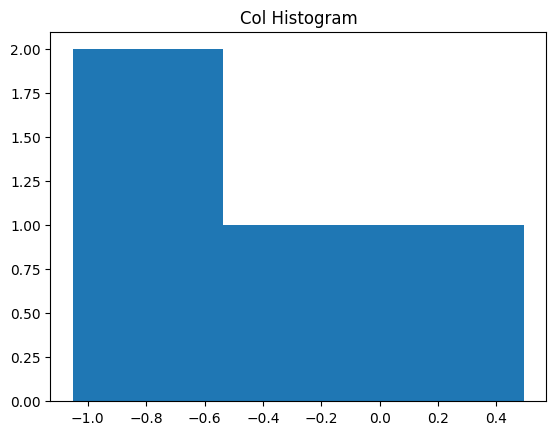

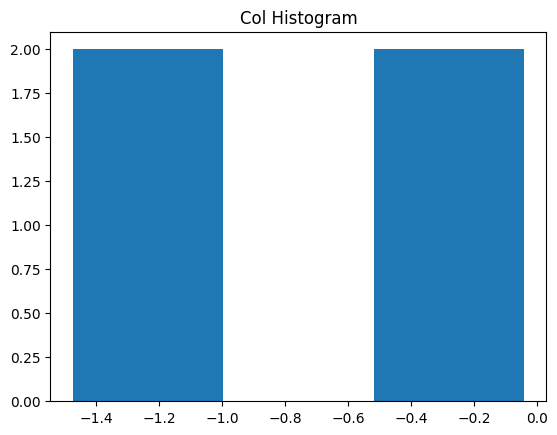

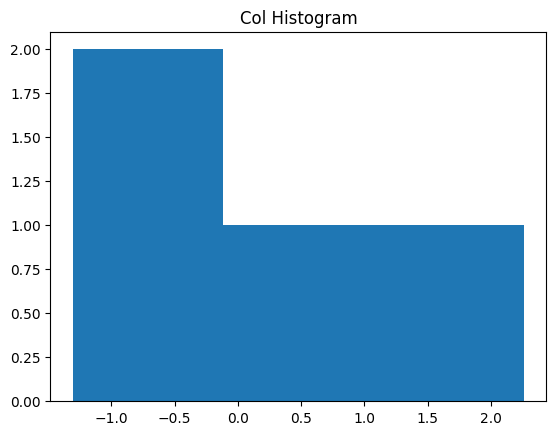

In [94]:
def matrixDistributionNormalLaw(m, n):
    matrix = np.random.normal(size=(m, n))
    column_means = np.mean(matrix, axis=0)
    column_vars = np.var(matrix, axis=0)
    row_means = np.mean(matrix, axis=1)
    row_vars = np.var(matrix, axis=1)

    for row in matrix:
        plt.hist(row, bins="auto")
        plt.title(f"Row Histogram")
        plt.show()

    for col in matrix.T:
        plt.hist(col, bins="auto")
        plt.title(f"Col Histogram")
        plt.show()

matrixDistributionNormalLaw(4, 4)

<h1>Задача 5. Напишите функцию, которая заполняет матрицу $(m, n)$ в шахматном порядке заданными числами $a$ и $b$. Напишите тесты для кода

In [97]:
def chess(m, n, a, b):
    matrix = np.zeros((m, n))
    for i in range(m):
        for j in range(n):
            if (i + j) % 2 == 0:
                matrix[i][j] = a
            else:
                matrix[i][j] = b

    return matrix

assert np.array_equal(chess(3, 3, 0, 1), np.array([[0, 1, 0], [1, 0, 1], [0, 1, 0]]))
assert np.array_equal(chess(2, 2, 6, 9), np.array([[6, 9], [9, 6]]))
assert np.array_equal(chess(1, 1, 7, 3), np.array([[7]]))

<h1>Задача 6. Напишите функцию, которая отрисовывает прямоугольник с заданными размерами (a, b) на изображении размера (m, n), цвет фона задайте в схеме RGB, как и цвет прямоугольника. Цвета также должны быть параметрами функции. Напишите аналогичную функцию но для овала с полуосями a и b. Напишите тесты для кода.
Примечание: уравнение эллипса (границы овала) можно записать как:
<h1>$\frac{(x-x_0)^2}{a^2}+\frac{(y-y_0)^2}{b^2}=1$

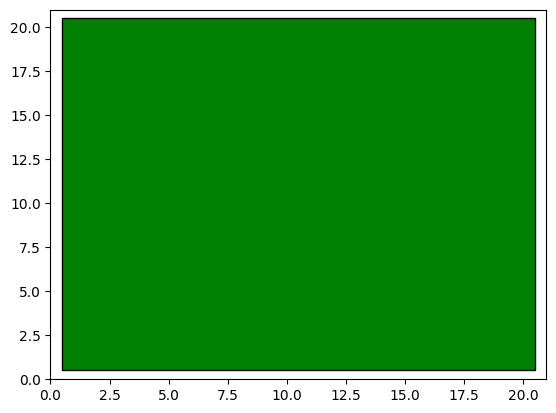

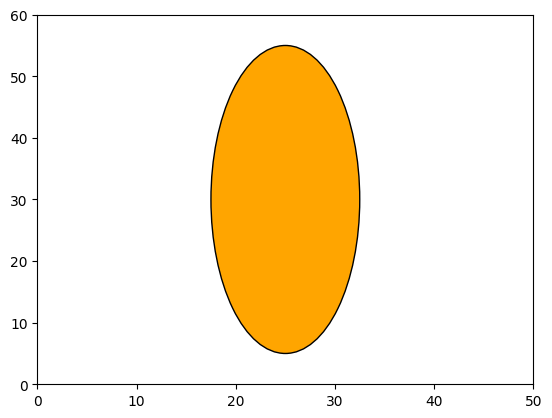

In [108]:
from matplotlib import patches


def draw_rectangle(a, b, m, n, rectangle_color, background_color):
    fig, ax = plt.subplots(1)
    ax.set_xlim([0, m])
    ax.set_ylim([0, n])
    ax.add_patch(patches.Rectangle((m / 2 - a / 2, n / 2 - b / 2), a, b, edgecolor="black", facecolor=rectangle_color))
    fig.patch.set_facecolor(background_color)
    plt.show()


def draw_ellipse(a, b, m, n, ellipse_color, background_color):
    fig, ax = plt.subplots(1)
    ax.set_xlim([0, m])
    ax.set_ylim([0, n])
    ax.add_patch(patches.Ellipse((m / 2, n / 2), a, b, edgecolor="black", facecolor=ellipse_color))
    fig.patch.set_facecolor(background_color)
    plt.show()


draw_rectangle(20, 20, 21, 21, "green", "white")
draw_ellipse(15, 50, 50, 60, "orange", "white")

<h1>Задача 7. Дан некий временной ряд. Для данного ряда нужно найти его: математическое ожидание, дисперсию, СКО, найти все локальные максимумы и минимумы (локальный максимум - это точка, которая больше своих соседних точек, а локальный минимум - это точка, которая меньше своих соседей), а также вычислить для данного ряда другой ряд, получаемый методом скользящего среднего с размером окна $p$.
<h1>Примечание: метод скользящего среднего подразумевает нахождение среднего из подмножетсва ряда размером $p$

In [112]:
def findExtrema(data):
    diff = np.append(np.nan, np.diff(data))
    sigDiff = np.sign(diff)
    diffSigDiff = np.append(np.nan, np.diff(sigDiff))
    localMin = np.where(diffSigDiff == 2)[0] - 1
    localMax = np.where(diffSigDiff == -2)[0] - 1

    return localMin, localMax


def timeSeriesAnalysis(timeSeries, p):
    mean = np.mean(timeSeries)
    variance = np.var(timeSeries)
    stdDev = np.std(timeSeries)
    localMin, localMax = findExtrema(timeSeries)
    movingAvg = np.convolve(timeSeries, np.ones(p), "valid") / p

    return mean, variance, stdDev, localMax, localMin, movingAvg


a = timeSeriesAnalysis(np.array([2, 1, 2, 4, 1, 3, 4, 2, 1]), 2)

assert np.isclose(a[0], 2.2222222222222223)
assert np.isclose(a[1], 1.2839506172839508)
assert np.isclose(a[2], 1.1331154474650633)
assert np.array_equal(a[3], (np.array([3, 6])))
assert np.array_equal(a[4], (np.array([1, 4])))
assert np.array_equal(a[5], (np.array([1.5, 1.5, 3., 2.5, 2., 3.5, 3., 1.5])))


<h1> Задача 8. Дан некоторый вектор с целочисленными метками классов, напишите функцию, которая выполняет one-hot-encoding для данного вектора
<h1> One-hot-encoding - представление, в котором на месте метки некоторого класса стоит 1, в остальных позициях стоит 0. Например для вектора [0, 2, 3, 0] one-hot-encoding выглядит как: [[1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0]]

In [110]:
def doOneHotEncoding(vector):
    matrix = np.zeros(shape=(len(vector), max(vector) + 1))

    for row, col in enumerate(vector):
        matrix[row, col] = 1

    return matrix


assert np.array_equal(doOneHotEncoding(np.array([0, 2, 3, 0])), np.array([[1., 0., 0., 0.],
                                                                          [0., 0., 1., 0.],
                                                                          [0., 0., 0., 1.],
                                                                          [1., 0., 0., 0.]]))

assert np.array_equal(doOneHotEncoding(np.array([6, 2, 3, 0])), np.array([[0., 0., 0., 0., 0., 0., 1.],
                                                                          [0., 0., 1., 0., 0., 0., 0.],
                                                                          [0., 0., 0., 1., 0., 0., 0.],
                                                                          [1., 0., 0., 0., 0., 0., 0.]]))